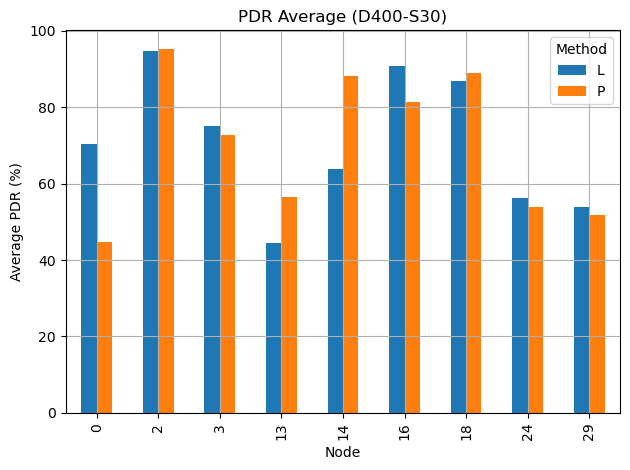

In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def extract_pdr_values(pdr_file_path):
    values = []
    with open(pdr_file_path, 'r') as f:
        for line in f:
            if ':' in line:
                try:
                    _, val = line.strip().split(':')
                    values.append(float(val.strip()))
                except:
                    continue
    return pd.Series(values).mean() if values else None

data = []

for node in nodes:
    for method in methods:
        path = os.path.join(base_path, method, density, speed, node, "PDR.txt")
        avg_pdr = extract_pdr_values(path)
        data.append({"Node": int(node[1:]), "Method": method, "PDR": avg_pdr})

df = pd.DataFrame(data)
df = df.sort_values("Node")

pivot_df = df.pivot(index="Node", columns="Method", values="PDR")
pivot_df.plot(kind="bar")
plt.ylabel("Average PDR (%)")
plt.title(f"PDR Average ({density}-{speed})")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/log/2025_06_17_AppSci_AODV_V07"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

=== 평균 PDR (단위: %) ===
Method          L          P
Node                        
0       70.282919  44.624810
2       94.620058  95.296288
3       75.170384  72.710864
13      44.342330  56.392357
14      63.920926  88.192516
16      90.802400  81.304591
18      86.842055  88.978019
24      56.158809  53.976130
29      53.863612  51.812871


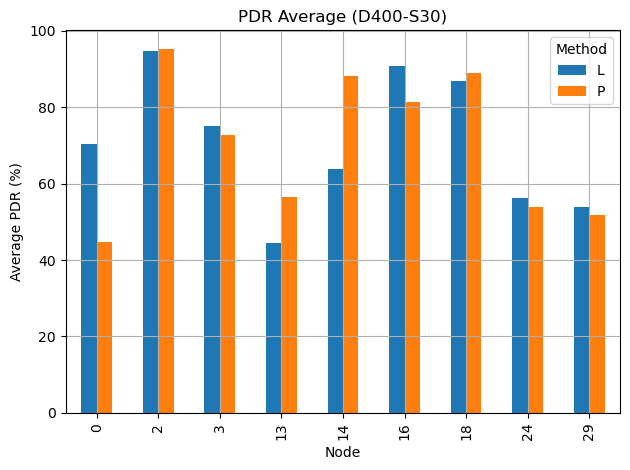

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03"
density = "D400"
speed = "S30"
nodes = ["N0", "N2", "N3", "N13", "N14", "N16", "N18", "N24", "N29"]
methods = ["L", "P"]

def extract_pdr_values(pdr_file_path):
    values = []
    with open(pdr_file_path, 'r') as f:
        for line in f:
            if ':' in line:
                try:
                    _, val = line.strip().split(':')
                    values.append(float(val.strip()))
                except:
                    continue
    return pd.Series(values).mean() if values else None

data = []

for node in nodes:
    for method in methods:
        path = os.path.join(base_path, method, density, speed, node, "PDR.txt")
        avg_pdr = extract_pdr_values(path)
        data.append({"Node": int(node[1:]), "Method": method, "PDR": avg_pdr})

df = pd.DataFrame(data)
df = df.sort_values("Node")

pivot_df = df.pivot(index="Node", columns="Method", values="PDR")

print("=== 평균 PDR (단위: %) ===")
print(pivot_df)

pivot_df.plot(kind="bar")
plt.ylabel("Average PDR (%)")
plt.title(f"PDR Average ({density}-{speed})")
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
import os

base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/L/D400/S30/'
base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/'
nodes = [0, 2, 3, 13, 14, 16, 18, 24, 29]

def count_rreq(file_path):
    if not os.path.isfile(file_path):
        return 0
    with open(file_path, 'r') as f:
        return len([line for line in f if line.strip()])

print("=== RREQ 전송 횟수 비교 (Legacy vs Proposed) ===")
print(f"{'Node':<5} {'Legacy':>10} {'Proposed':>10}")

for node in nodes:
    legacy_path = os.path.join(base_path_legacy, f"N{node}", "rreqCount.txt")
    proposed_path = os.path.join(base_path_proposed, f"N{node}", "rreqCount.txt")
    legacy_count = count_rreq(legacy_path)
    proposed_count = count_rreq(proposed_path)
    print(f"{node:<5} {legacy_count:>10} {proposed_count:>10}")


=== RREQ 전송 횟수 비교 (Legacy vs Proposed) ===
Node      Legacy   Proposed
0          73415      48964
2          46955      61249
3          77538     142927
13        193433     217517
14         47641      33750
16        107203      73465
18         99326      98694
24        168296     169026
29         90702      85906


=== RREQ 전송 성공 횟수 (Legacy vs Proposed) ===
Node      Legacy   Proposed
0          73446      48972
2          46982      61268
3          77556     142951
13        193466     217607
14         47651      33751
16        107226      73481
18         99358      98711
24        168341     169093
29         90723      85941


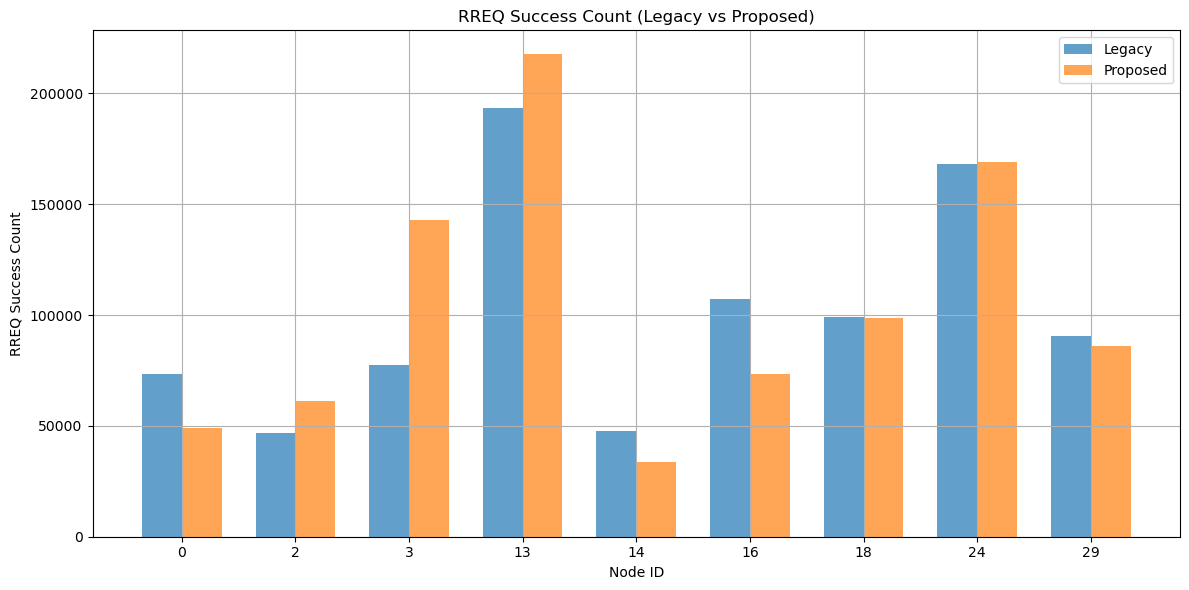

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/L/D400/S30/N'
base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N'
nodes = [0, 2, 3, 13, 14, 16, 18, 24, 29]

def count_rreq_success(base_path, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path + str(node), 'sinr_all_log.csv')
        if not os.path.isfile(file_path):
            result[node] = 0
            continue
        df = pd.read_csv(file_path, low_memory=False)
        df.columns = df.columns.str.strip()
        if 'Packet' not in df.columns or 'Success' not in df.columns:
            result[node] = 0
            continue
        success_count = len(df[(df['Packet'] == 'aodv::Rreq') & (df['Success'] == True)])
        result[node] = success_count
    return result

legacy_success = count_rreq_success(base_path_legacy, nodes)
proposed_success = count_rreq_success(base_path_proposed, nodes)

print("=== RREQ 전송 성공 횟수 (Legacy vs Proposed) ===")
print(f"{'Node':<5} {'Legacy':>10} {'Proposed':>10}")
for node in nodes:
    print(f"{node:<5} {legacy_success[node]:>10} {proposed_success[node]:>10}")

x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [legacy_success[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [proposed_success[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)

plt.xticks(x, nodes)
plt.xlabel("Node ID")
plt.ylabel("RREQ Success Count")
plt.title("RREQ Success Count (Legacy vs Proposed)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
import os
import pandas as pd

base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/L/D400/S30/N'
base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N'
nodes = [0, 2, 3, 13, 14, 16, 18, 24, 29]

def extract_metrics(base_path, nodes, label):
    results = []
    for node in nodes:
        node_path = os.path.join(base_path + str(node))
        rreq_path = os.path.join(node_path, 'rreqCount.txt')
        sinr_path = os.path.join(node_path, 'sinr_all_log.csv')
        recv_path = os.path.join(node_path, 'success_app.txt')

        if not (os.path.isfile(rreq_path) and os.path.isfile(sinr_path) and os.path.isfile(recv_path)):
            print(f"[{label} N{node}] 파일 없음 → {rreq_path}, {sinr_path}, {recv_path}")
            continue

        # RREQ 총 발생 수
        with open(rreq_path, 'r', encoding='utf-8') as f:
            total_rreq = sum(1 for _ in f)

        # Drop 수: RREQ만 필터링
        try:
            df_sinr = pd.read_csv(sinr_path)
            df_sinr.columns = df_sinr.columns.str.strip()
            if 'type' in df_sinr.columns:
                drop_rreq = df_sinr[df_sinr['type'] == 'RREQ'].shape[0]
            elif 'pktType' in df_sinr.columns:
                drop_rreq = df_sinr[df_sinr['pktType'] == 'RREQ'].shape[0]
            else:
                drop_rreq = 0
        except Exception as e:
            print(f"[{label} N{node}] CSV 오류: {e}")
            drop_rreq = 0

        # 수신 성공 수
        with open(recv_path, 'r', encoding='utf-8') as f:
            recv_count = sum(1 for _ in f)

        drop_ratio = (drop_rreq / total_rreq * 100) if total_rreq > 0 else 0

        results.append({
            'Node': node,
            'Version': label,
            'Total_RREQ': total_rreq,
            'Drop_RREQ': drop_rreq,
            'Drop_Ratio(%)': round(drop_ratio, 2),
            'Recv_Count(PDR)': recv_count
        })

    return pd.DataFrame(results)

# 실행
df_legacy = extract_metrics(base_path_legacy, nodes, 'Legacy')
df_proposed = extract_metrics(base_path_proposed, nodes, 'Proposed')
df_all = pd.concat([df_legacy, df_proposed], ignore_index=True)

# 결과 출력
print(df_all)


    Node   Version  Total_RREQ  Drop_RREQ  Drop_Ratio(%)  Recv_Count(PDR)
0      0    Legacy       73415          0            0.0              450
1      2    Legacy       46955          0            0.0              663
2      3    Legacy       77538          0            0.0              415
3     13    Legacy      193433          0            0.0              432
4     14    Legacy       47641          0            0.0              577
5     16    Legacy      107203          0            0.0              620
6     18    Legacy       99326          0            0.0              580
7     24    Legacy      168296          0            0.0              385
8     29    Legacy       90702          0            0.0              522
9      0  Proposed       48964          0            0.0              512
10     2  Proposed       61249          0            0.0              635
11     3  Proposed      142927          0            0.0              502
12    13  Proposed      217517        

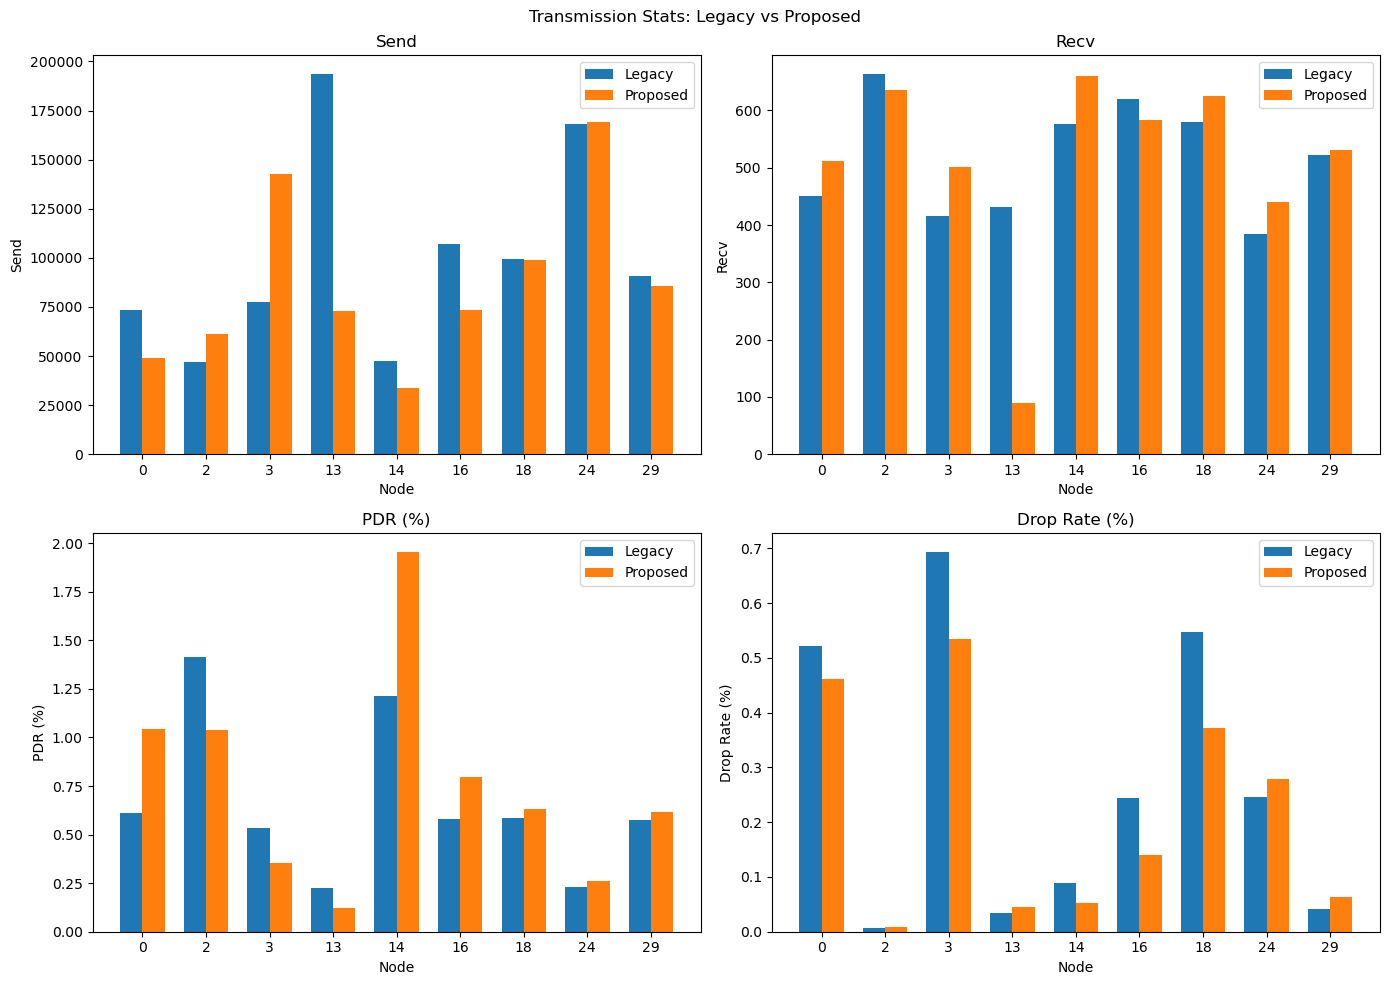

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nodes = [0, 2, 3, 13, 14, 16, 18, 24, 29]

base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N'
base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N'

def compute_metrics(base_path, nodes):
    data = []

    for node in nodes:
        node_path = os.path.join(base_path + str(node) + '/')
        rreq_file = os.path.join(node_path, 'rreqCount.txt')
        drop_file = os.path.join(node_path, 'sinr_all_log.csv')
        recv_file = os.path.join(node_path, 'success_app.txt')  # 필요 시 수정

        # 전송 시도 수
        send = 0
        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                send = len(f.readlines())

        # Drop 수 (Receiver == node and Success == False)
        drop = 0
        if os.path.isfile(drop_file):
            try:
                df_drop = pd.read_csv(drop_file)
                if ' Receiver' in df_drop.columns and ' Success' in df_drop.columns:
                    df_node = df_drop[df_drop[' Receiver'] == node]
                    drop = df_node[df_node[' Success'] == False].shape[0]
            except:
                drop = 0

        # 수신 성공 수
        recv = 0
        if os.path.isfile(recv_file):
            with open(recv_file, 'r') as f:
                recv = len(f.readlines())

        # PDR 및 Drop률
        pdr = (recv / send * 100) if send > 0 else 0
        drop_rate = (drop / send * 100) if send > 0 else 0

        data.append({
            'Node': node,
            'Send': send,
            'Recv': recv,
            'Drop': drop,
            'PDR (%)': pdr,
            'Drop Rate (%)': drop_rate
        })

    return pd.DataFrame(data)

# 실행
df_legacy = compute_metrics(base_path_legacy, nodes)
df_legacy['Method'] = 'Legacy'

df_proposed = compute_metrics(base_path_proposed, nodes)
df_proposed['Method'] = 'Proposed'

df_all = pd.concat([df_legacy, df_proposed])

# 시각화
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Transmission Stats: Legacy vs Proposed')

bar_width = 0.35
x = np.arange(len(nodes))  # 0,1,2,... (균등 간격)

metrics = ['Send', 'Recv', 'PDR (%)', 'Drop Rate (%)']

for ax, metric in zip(axs.flat, metrics):
    df_legacy_plot = df_legacy.set_index('Node').reindex(nodes).reset_index()
    df_proposed_plot = df_proposed.set_index('Node').reindex(nodes).reset_index()

    ax.bar(x - bar_width/2, df_legacy_plot[metric], width=bar_width, label='Legacy')
    ax.bar(x + bar_width/2, df_proposed_plot[metric], width=bar_width, label='Proposed')

    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(nodes)
    ax.set_xlabel('Node')
    ax.set_ylabel(metric)
    ax.legend(loc='best')

plt.tight_layout()
plt.show()


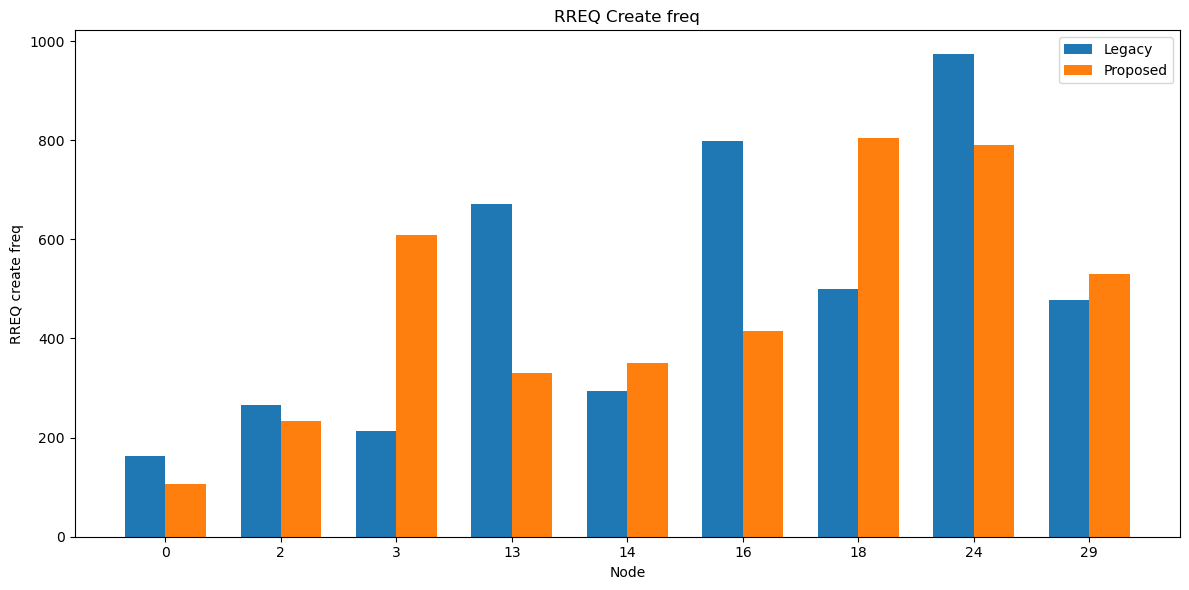

In [37]:
import os
import matplotlib.pyplot as plt

nodes = [0, 2, 3, 13, 14, 16, 18, 24, 29]

base_path_legacy = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/L/D400/S30/N"
base_path_proposed = "C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_16_AppSci_AODV_V02/P/D400/S30/N"

def count_rreq_occurrences(base_path, nodes):
    result = {}
    for node in nodes:
        file_path = os.path.join(base_path + str(node), "rreqCount.txt")
        count = 0
        if os.path.isfile(file_path):
            with open(file_path, 'r') as f:
                for line in f:
                    if f"node[{node}]" in line:
                        count += 1
        result[node] = count
    return result

legacy_rreq = count_rreq_occurrences(base_path_legacy, nodes)
proposed_rreq = count_rreq_occurrences(base_path_proposed, nodes)

x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [legacy_rreq[n] for n in nodes], width=bar_width, label='Legacy')
plt.bar([i + bar_width/2 for i in x], [proposed_rreq[n] for n in nodes], width=bar_width, label='Proposed')
plt.xticks(x, nodes)
plt.xlabel('Node')
plt.ylabel('RREQ create freq')
plt.title('RREQ Create freq')
plt.legend()
plt.tight_layout()
plt.show()


=== RREQ Drop Ratio (%) ===
Node      Legacy   Proposed
0          57.94      51.89
2          68.61      68.60
3          62.47      57.93
13         57.40      55.59
14         60.66      62.66
16         62.34      61.01
18         62.85      66.08
24         61.04      58.07
29         61.07      58.84


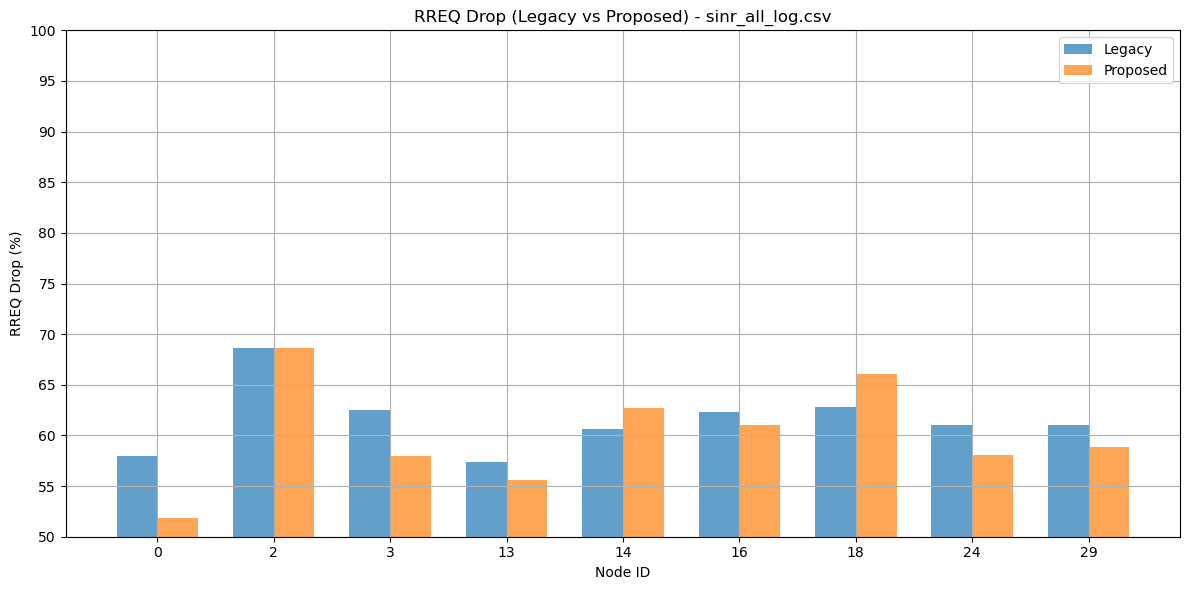

In [39]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

h_node = [0, 2, 3, 13, 14, 16, 18, 24, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/L/D400/S30/N'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = base_path + str(node) + '/'
        rreq_file = node_path + 'rreqCount.txt'
        all_log_file = node_path + 'sinr_all_log.csv'

        rreq_total = 0
        rreq_drop = 0

        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(all_log_file):
            df = pd.read_csv(all_log_file, low_memory=False)
            df.columns = df.columns.str.strip()
            if "Success" in df.columns and "Packet" in df.columns:
                rreq_fail = df[(df["Packet"] == "aodv::Rreq") & (df["Success"] == False)]
                rreq_drop = len(rreq_fail)

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

# 계산
rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

# 출력
print("=== RREQ Drop Ratio (%) ===")
print("{:<5} {:>10} {:>10}".format("Node", "Legacy", "Proposed"))
for node in h_node:
    legacy = rreq_drop_legacy.get(node, 0.0)
    proposed = rreq_drop_proposed.get(node, 0.0)
    print("{:<5} {:>10.2f} {:>10.2f}".format(node, legacy, proposed))

# 시각화
nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%)')
plt.title('RREQ Drop (Legacy vs Proposed) - sinr_all_log.csv')
plt.ylim(50, 100)
plt.yticks(range(50, 101, 5))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N0\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N2\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N3\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N13\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N14\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N16\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N18\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/N24\sinr_all_log.csv
C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_

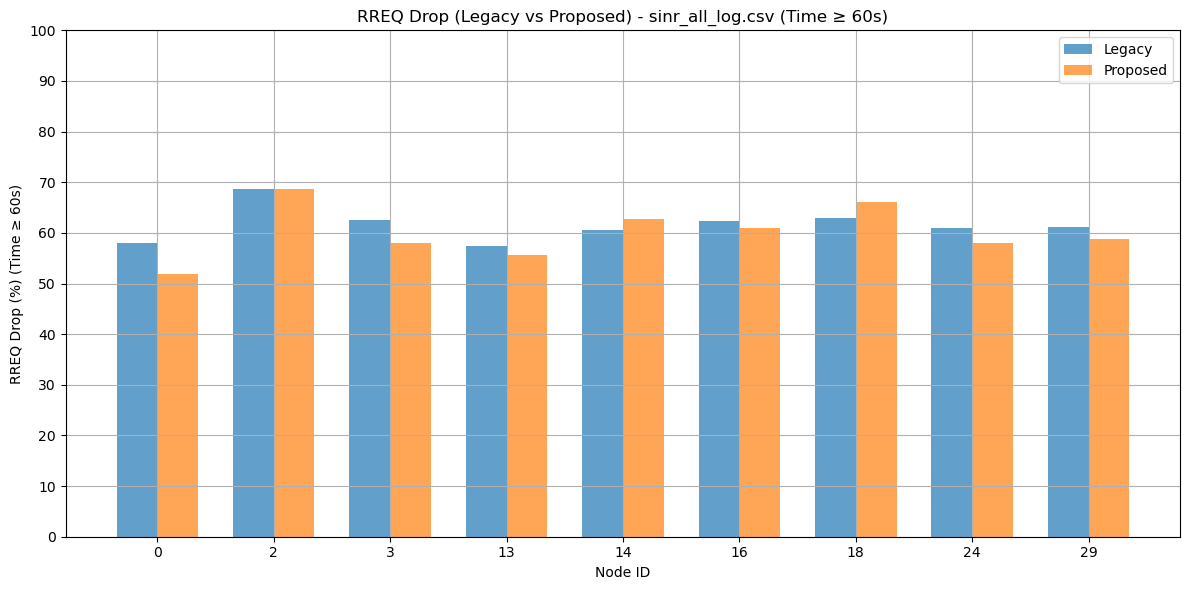

In [27]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

h_node = [0, 2, 3, 13, 14, 16, 18, 24, 29]

base_path_proposed = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/P/D400/S30/'
base_path_legacy = 'C:/Users/Choe JongHyeon/Desktop/Applied Science/시뮬레이션 결과/2025_06_17_AppSci_AODV_V03/L/D400/S30/'

def compute_rreq_drop_ratio(base_path, nodes):
    result = {}
    for node in nodes:
        node_path = os.path.join(base_path, f"N{node}")
        rreq_file = os.path.join(node_path, 'rreqCount.txt')
        all_log_file = os.path.join(node_path, 'sinr_all_log.csv')

        print(all_log_file)

        rreq_total = 0
        rreq_drop = 0

        if os.path.isfile(rreq_file):
            with open(rreq_file, 'r') as f:
                rreq_total = len(f.readlines())

        if os.path.isfile(all_log_file):
            df = pd.read_csv(all_log_file, low_memory=False)
            df.columns = df.columns.str.strip()
            if {"Success", "Packet", "Time"}.issubset(df.columns):
                df["Time"] = pd.to_numeric(df["Time"], errors="coerce")
                df = df[df["Time"] >= 30.0]
                rreq_fail = df[(df["Packet"] == "aodv::Rreq") & (df["Success"] == False)]
                rreq_drop = len(rreq_fail)

        drop_ratio = (rreq_drop / rreq_total) * 100 if rreq_total > 0 else 0.0
        result[node] = drop_ratio

    return result

rreq_drop_proposed = compute_rreq_drop_ratio(base_path_proposed, h_node)
rreq_drop_legacy = compute_rreq_drop_ratio(base_path_legacy, h_node)

nodes = h_node
x = range(len(nodes))
bar_width = 0.35

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x], [rreq_drop_legacy[n] for n in nodes], width=bar_width, label='Legacy', alpha=0.7)
plt.bar([i + bar_width/2 for i in x], [rreq_drop_proposed[n] for n in nodes], width=bar_width, label='Proposed', alpha=0.7)
plt.xticks(x, nodes)
plt.xlabel('Node ID')
plt.ylabel('RREQ Drop (%) (Time ≥ 60s)')
plt.title('RREQ Drop (Legacy vs Proposed) - sinr_all_log.csv (Time ≥ 60s)')
plt.ylim(0, 100)
plt.yticks(range(0, 101, 10))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
